[240000.] C in CD
1.3098671436309814 time for explicit
0.0010366439819335938 0 time implicit0
0.0011379718780517578 1 time implicit1
0.001031637191772461 2 time implicit2
0.0010373592376708984 3 time implicit3
0.000972747802734375 4 time implicit4
0.0010313987731933594 5 time implicit5
0.0009286403656005859 6 time implicit6
0.001020193099975586 7 time implicit7
0.001062154769897461 8 time implicit8
0.0010995864868164062 9 time implicit9
0.0011076927185058594 10 time implicit10
0.0010294914245605469 11 time implicit11
0.0010609626770019531 12 time implicit12
0.0009691715240478516 13 time implicit13
0.0010800361633300781 14 time implicit14
0.0009989738464355469 15 time implicit15
0.0010633468627929688 16 time implicit16
0.0010991096496582031 17 time implicit17
0.0011005401611328125 18 time implicit18
235.686 mean 137.85340399999998 var 237.029 tau_mean 152.73015900000001 tau var prey
[600] all particles
tau: 237.029 number of injected particles
explicit: 235.686 number of injected partic

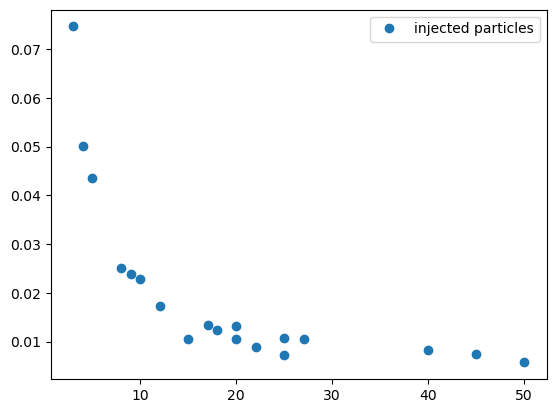

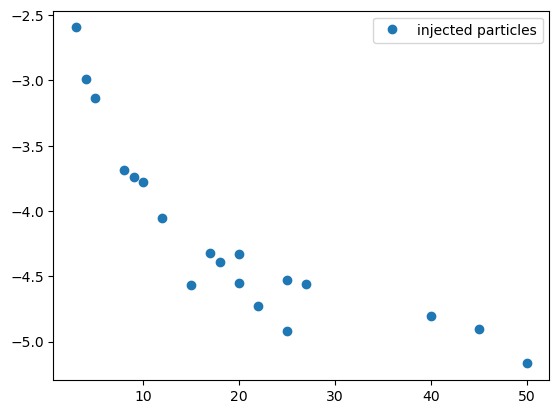

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 11 16:56:31 2024

@author: kostre
"""

import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import time

np.random.seed(0)

# Parameters


deltar=0.05
Lx=deltar
a=2*deltar
Ly=deltar
D=0.3
deltat=(deltar**2)/(2*D)
gamma=D/(deltar)**2
# whole domain is a times Ly, and each domain is deltar times deltar


# generate uniformly distributed particles in [0,0.5][0,1]

BC1=np.array([600])

print(BC1/(deltar**2),'C in CD')

def concentrationmovement_tauleaping(Boundaryconcentration_t, tau, deltar, L, gamma, M): 
    '''
    Returns a list of positions (2D arrays) of the new particles in the PBS domain (Children). 
    The particles are injected with probability gamma. 

    Parameters:
    - Boundaryconcentration_t: list or array of Boundary concentration of each cell of length and width deltar (L/deltar= number of boundary cells).
    - M: number of sub-steps in tau-leaping.
    - tau: overall time step size.
    - deltar: spatial cell size.
    - L: domain size.
    - gamma: injection rate.
    
    Returns:
    - Children: List of 2D arrays with positions of newly injected particles in the PBS domain.
    '''
    
    Children = []
    
    # Loop over all boundary cells
    for i in range(len(Boundaryconcentration_t)):    
        
        particles_in_cell = Boundaryconcentration_t[i]  # Number of particles in cell i
        injected_particles = 0  # Number of injected particles initially 0
        delta_tau = tau / M  # Time step for each sub-step in tau-leaping
    
        # Loop over M sub-steps
        for k in range(M):
            if particles_in_cell <= injected_particles:
                break  # Exit loop if no more particles to inject
            
            Lambda = gamma * (particles_in_cell - injected_particles)
            injected_particles += np.random.poisson(Lambda * delta_tau)  # Update injected_particles
           
        # Inject particles into the domain based on the number injected
        for j in range(injected_particles):
            x_pos = np.random.uniform(L - deltar, L)
            y_pos = np.random.uniform(deltar * i, deltar * (i + 1))
            Children.append(np.array([x_pos, y_pos]))
        
        

    return Children


def concentrationmovement_Explicit( Boundaryconcentration_t, deltat,deltar, L, gamma): 
    
    '''
    Returns a list of positions (2D arrays) of the new particles in the PBS domain (Children). The particles are injected with proabibility gamma. 
    Only the particles that did not proliferated in the same time-step can be injected. Therefore we have to subtract the 'Extra' particles 
    from the total boundaryconcentrations.
    deltat=time
    Booundaryconcentration_t=list or array of Boundaryconcentration of each cell of length and width deltar (L/deltar= number of boundary cells).
    deltat=time-step size
    gamme=injection rate
    deltar=boundary cell length and width
    Extra=number of  actual dead virtal preys in the boundary cell
    L=domain size
    '''
    Children=[]
    Pr=1-np.exp(-gamma*deltat) # probability of injection
    for i in range(len(Boundaryconcentration_t)):       
        
        integ, dec = int(np.floor(Boundaryconcentration_t[i])), Boundaryconcentration_t[i]-int(np.floor(Boundaryconcentration_t[i]))
        for v in range(integ): # test for every particle           
            if Pr > np.random.rand():
                Children.append(np.array([np.random.uniform(L-deltar, L), np.random.uniform(deltar*i,deltar*(i+1))]))        
        if 1-np.exp(-gamma*deltat*dec)>np.random.rand(): # for the virtual particle
            Children.append(np.array([np.random.uniform(L-deltar,L), np.random.uniform(deltar*i, deltar*(i+1))]))

    return Children



InjectedParticles=[]
start=time.time()
sim=1000
for s in range(sim):
    
    injectedparticles=concentrationmovement_Explicit(BC1, deltat, deltar, Lx,gamma)
    InjectedParticles.append(len(injectedparticles))
   
end=time.time()
print(end-start, 'time for explicit')
mean_particles = np.mean(InjectedParticles)
var_particles = np.var(InjectedParticles)



sim=1000
ListM=[3,4,5,8,9,10, 12, 15,17,18,20,22,25,27,20,25,40,45,50]
Error=np.zeros(len(ListM))

for i in range(len(ListM)):
    InjectedParticles=[]
    
   
    for s in range(sim):
        start=time.time()
        injectedparticles=concentrationmovement_tauleaping(BC1, deltat, deltar, Lx,gamma, ListM[i])
        InjectedParticles.append(len(injectedparticles))
        end=time.time()
    # Calculate the mean and variance for each list
    
    if s==sim-1:
        print(end-start, i, 'time implicit'+str(i)) 
    mean_particlesTau = np.mean(InjectedParticles)
    var_particlesTau = np.var(InjectedParticles)
    
   
    
    Error[i]= np.abs(mean_particlesTau-mean_particles)/mean_particles

  
fig=plt.figure()

plt.plot(ListM, Error,'o', label='injected particles')
plt.legend()


print(mean_particles,'mean', var_particles, 'var', mean_particlesTau,'tau_mean', var_particlesTau, 'tau var', 'prey')



print(BC1, 'all particles')


print('tau:',mean_particlesTau, 'number of injected particles')
print('explicit:',mean_particles, 'number of injected particles' )



fig=plt.figure()

plt.plot(ListM, np.log(Error), 'o', label='injected particles')
plt.legend()




